In [233]:
import statsmodels.api as sm #for OLS regression
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #for heatmap plotting
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns #for heatmap plotting
from statsmodels.iolib.summary2 import summary_col #to summarize multiple regressions in one table
from datetime import date
from dateutil.relativedelta import relativedelta
import math
from scipy import stats
import seaborn as sns

In [236]:
ff5 = pd.read_csv('data/F-F_Research_Data_5_Factors_2x3_daily.csv')

In [237]:
ff5.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [238]:
ff5['YYMM'] = pd.to_datetime(ff5['YYMM'],yearfirst=True, format='%Y%m%d')

In [239]:
ff5.index = ff5['YYMM']

In [240]:
ff5 = ff5.drop('RF', axis = 1)

In [241]:
ff5 = ff5.drop('YYMM', axis=1)

In [256]:
ff5.head()

,Mkt-RF,SMB,HML,RMW,CMA
YYMM,,,,,
1963-07-01,-0.67,0.00,-0.32,-0.01,0.15
1963-07-02,0.79,-0.27,0.27,-0.07,-0.19
1963-07-03,0.63,-0.17,-0.09,0.17,-0.33
1963-07-05,0.40,0.08,-0.28,0.08,-0.33
1963-07-08,-0.63,0.04,-0.18,-0.29,0.13


In [258]:
df = ff5.rolling(126).corr().unstack(1)

In [259]:
cols_tuple = list(df.columns)
df.columns = cols_tuple

In [260]:
new_cols = list(set([tuple((sorted(list(x)))) for x in cols_tuple]))

In [261]:
new_cols
pairs = sorted([x for x in new_cols if x[0]!=x[1]])
pairs

[('CMA', 'HML'),
 ('CMA', 'Mkt-RF'),
 ('CMA', 'RMW'),
 ('CMA', 'SMB'),
 ('HML', 'Mkt-RF'),
 ('HML', 'RMW'),
 ('HML', 'SMB'),
 ('Mkt-RF', 'RMW'),
 ('Mkt-RF', 'SMB'),
 ('RMW', 'SMB')]

In [262]:
df1 = df[pairs]
df1

,"(CMA, HML)","(CMA, Mkt-RF)","(CMA, RMW)","(CMA, SMB)","(HML, Mkt-RF)","(HML, RMW)","(HML, SMB)","(Mkt-RF, RMW)","(Mkt-RF, SMB)","(RMW, SMB)"
YYMM,,,,,,,,,,
1963-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


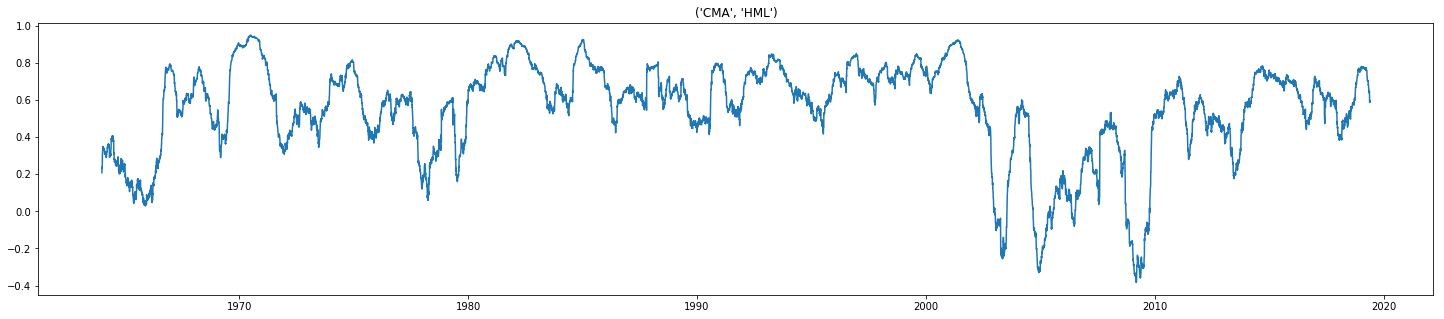

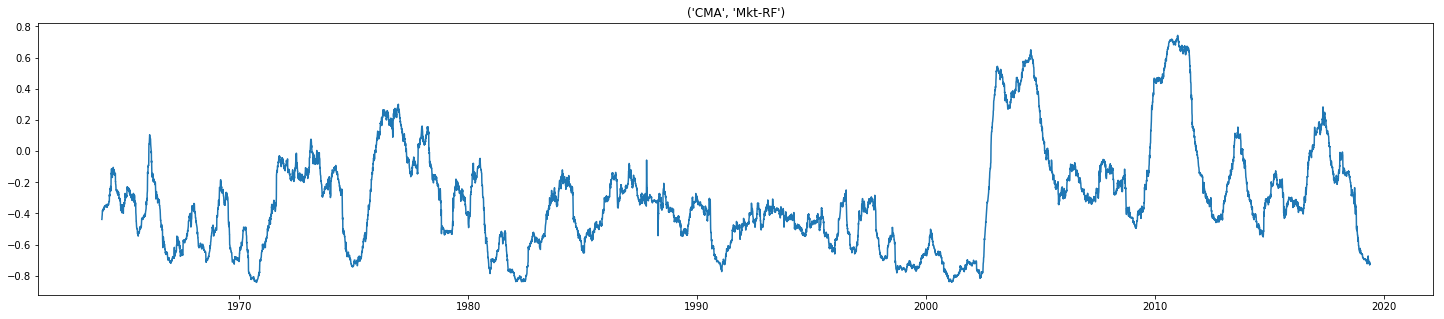

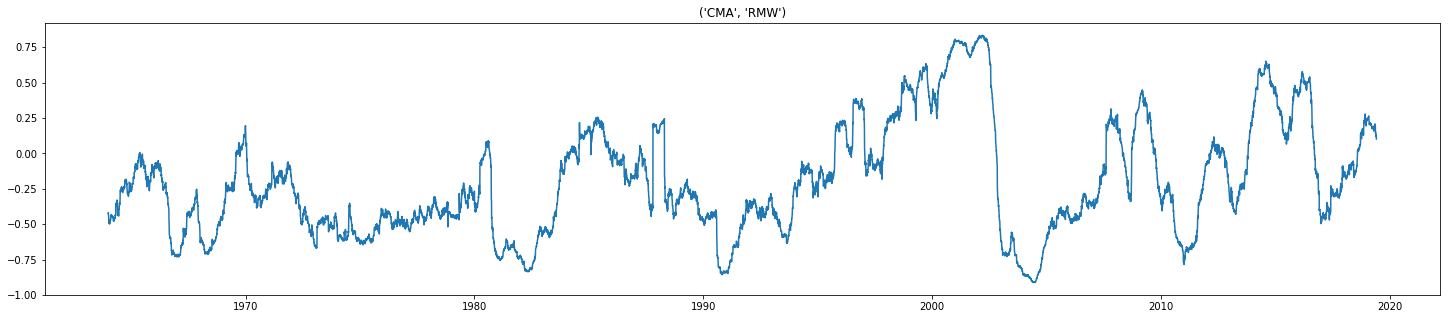

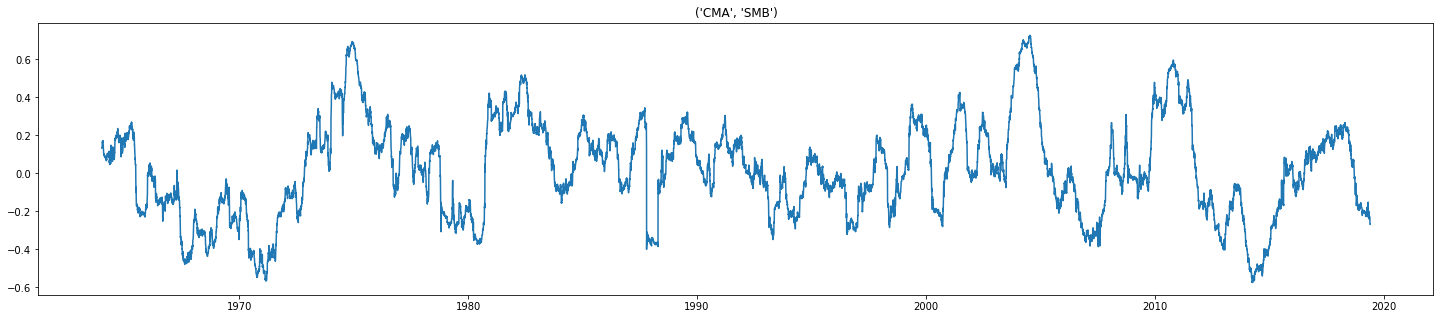

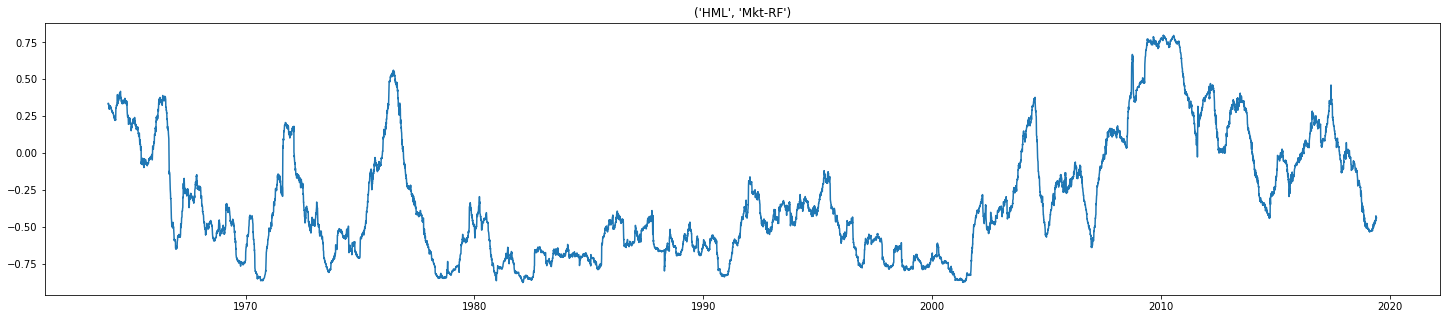

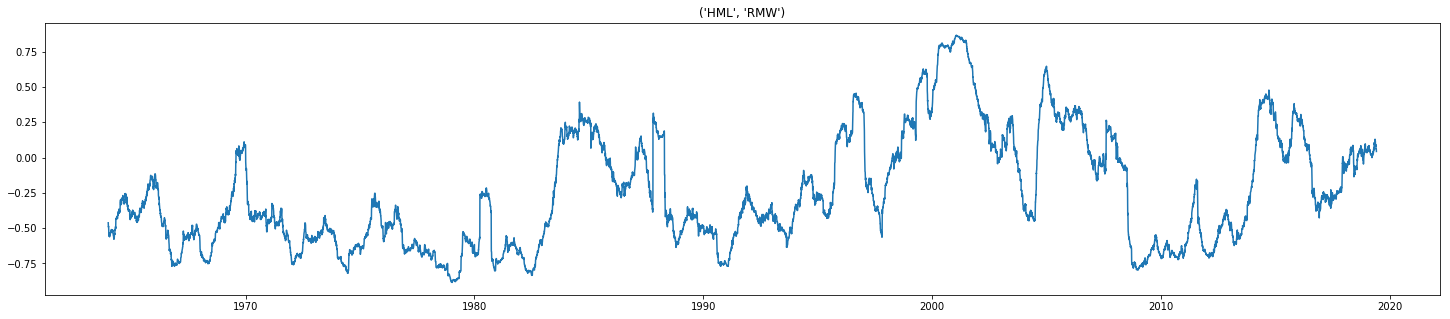

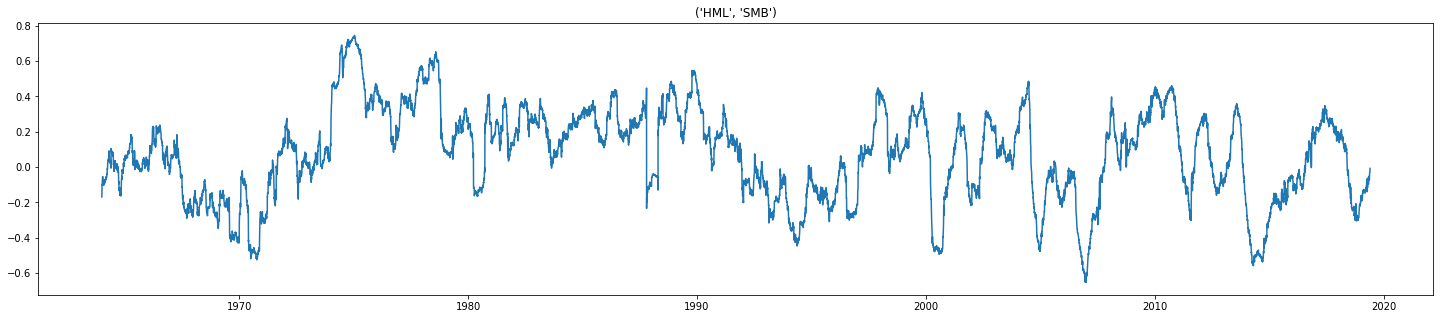

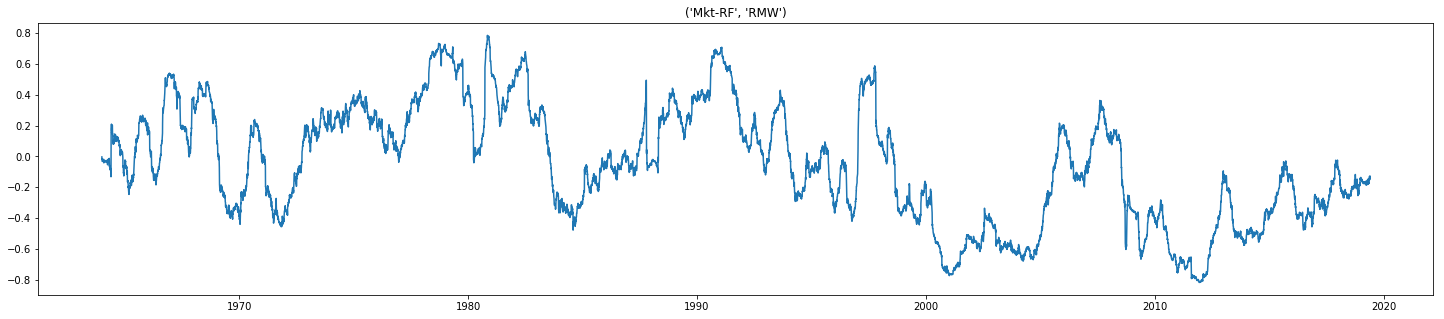

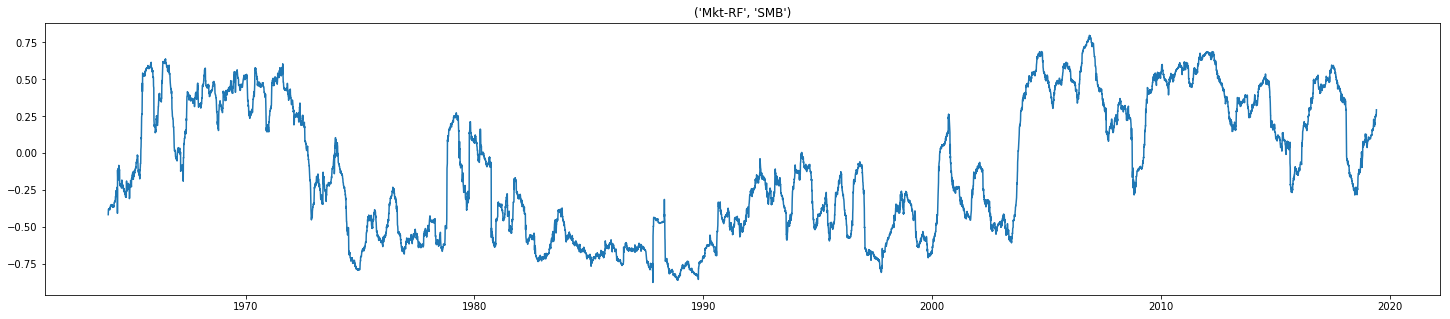

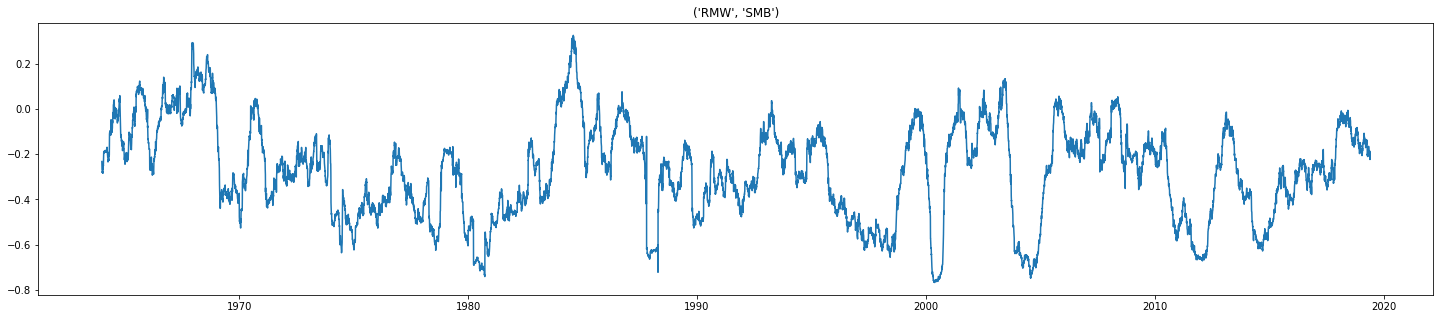

In [263]:
for col in df1.columns:
    plt.figure(figsize=(25,5))
    plt.title(col)
    plt.plot(df1[col])

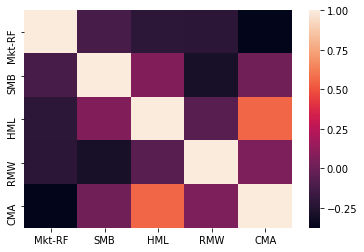

In [265]:
ff5_corr = ff5.corr()

# plot the heatmap
sns.heatmap(ff5_corr, 
        xticklabels=ff5_corr.columns,
        yticklabels=ff5_corr.columns)

In [266]:
ff5_corr

,Mkt-RF,SMB,HML,RMW,CMA
Mkt-RF,1.000000,-0.113855,-0.212171,-0.216183,-0.376542
SMB,-0.113855,1.000000,0.070257,-0.290434,0.023296
HML,-0.212171,0.070257,1.000000,-0.060792,0.557616
RMW,-0.216183,-0.290434,-0.060792,1.000000,0.059767
CMA,-0.376542,0.023296,0.557616,0.059767,1.000000


In [267]:
df1[('CMA', 'HML')].mean()

0.5500892048168713

In [268]:
df1[('CMA', 'HML')].std()

0.2539408989297424

In [269]:
def get_corr_range(col):
    mean_ = col.mean()
    std_ = col.std()
    return (mean_ - 1.96*std_ , mean_ + 1.96*std_)

In [270]:
df1.apply(get_corr_range)

(CMA, HML)       (0.052365042914576165, 1.0478133667191665)
(CMA, Mkt-RF)    (-0.9566823948539958, 0.33253591690010803)
(CMA, RMW)        (-0.9612670948934046, 0.5661334700760603)
(CMA, SMB)        (-0.4742804877994562, 0.5110993426369512)
(HML, Mkt-RF)    (-1.1169574306831482, 0.47273652242730285)
(HML, RMW)        (-1.0318685549929931, 0.5314351457272786)
(HML, SMB)        (-0.4332868766767284, 0.5785161168291995)
(Mkt-RF, RMW)     (-0.7745037164624454, 0.6742954777264584)
(Mkt-RF, SMB)     (-0.9907594018300117, 0.7841494991294464)
(RMW, SMB)       (-0.6842542971439314, 0.13353261910370928)
dtype: object

In [ ]:
models_ff = []
for i in range (5):
    x = ff5.drop(ff5.columns[i], axis=1)
    x = sm.add_constant(x)
    y = ff5.iloc[:, i]
    reg = sm.OLS(y, x)   
    models_ff.append(reg.fit())

In [11]:
print(models_ff[4].summary())

                            OLS Regression Results                            
Dep. Variable:                    CMA   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     2184.
Date:                Mon, 15 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:04:34   Log-Likelihood:                -2372.1
No. Observations:               14075   AIC:                             4754.
Df Residuals:                   14070   BIC:                             4792.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.002      4.138      0.0

In [14]:
info_dict={'R-squared' : lambda x: x.rsquared,
           'No. observations' : lambda x: int(x.nobs)}
           
results_table = summary_col(results= models_ff,
                            stars = True,
                            model_names=ff5.columns.tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict,
                            regressor_order=['const', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
                           )

results_table.add_title('Regressions among 5 Factors - Daily Return')

print(results_table)

              Regressions among 5 Factors - Daily Return
                   Mkt-RF      SMB        HML        RMW        CMA    
-----------------------------------------------------------------------
const            0.05***    0.02***    0.01**     0.02***    0.01***   
                 (0.01)     (0.00)     (0.00)     (0.00)     (0.00)    
Mkt-RF                      -0.10***   -0.01**    -0.10***   -0.10***  
                            (0.00)     (0.00)     (0.00)     (0.00)    
SMB              -0.33***              0.03***    -0.22***   -0.03***  
                 (0.01)                (0.01)     (0.01)     (0.00)    
HML              -0.04**    0.04***               -0.08***   0.37***   
                 (0.02)     (0.01)                (0.01)     (0.00)    
RMW              -0.66***   -0.46***   -0.12***              0.02***   
                 (0.02)     (0.01)     (0.01)                (0.01)    
CMA              -0.93***   -0.07***   0.77***    0.03***              
       

In [17]:
ff5_mm = pd.read_csv('data/F-F_Research_Data_5_Factors_2x3_monthly.csv')

In [18]:
ff5_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [19]:
ff5_mm['YYMM'] = pd.to_datetime(ff5_mm['YYMM'],yearfirst=True, format='%Y%m')

In [20]:
ff5_mm.index = ff5_mm['YYMM']

In [21]:
ff5_mm = ff5_mm.drop('RF', axis = 1)
ff5_mm = ff5_mm.drop('YYMM', axis=1)

In [22]:
models_ff_mm = []
for i in range (5):
    x = ff5_mm.drop(ff5_mm.columns[i], axis=1)
    x = sm.add_constant(x)
    y = ff5_mm.iloc[:, i]
    reg = sm.OLS(y, x)   
    models_ff_mm.append(reg.fit())

In [24]:
info_dict={'R-squared' : lambda x: x.rsquared,
           'No. observations' : lambda x: int(x.nobs)}
           
results_table = summary_col(results= models_ff_mm,
                            stars = True,
                            model_names=ff5_mm.columns.tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict,
                            regressor_order=['const', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
                           )

results_table.add_title('Regressions among 5 Factors - Monthly Return')

print(results_table)

        Regressions among 5 Factors - Monthly Return
                  Mkt-RF    SMB      HML      RMW      CMA   
-------------------------------------------------------------
const            0.79***  0.30***  -0.02    0.40***  0.23*** 
                 (0.15)   (0.11)   (0.08)   (0.08)   (0.05)  
Mkt-RF                    0.13***  0.02     -0.10*** -0.11***
                          (0.03)   (0.02)   (0.02)   (0.01)  
SMB              0.25***           0.03     -0.22*** -0.03   
                 (0.05)            (0.03)   (0.03)   (0.02)  
HML              0.09     0.06              0.14***  0.45*** 
                 (0.07)   (0.05)            (0.04)   (0.02)  
RMW              -0.38*** -0.43*** 0.14***           -0.14***
                 (0.07)   (0.05)   (0.04)            (0.03)  
CMA              -0.91*** -0.13    1.00***  -0.29***         
                 (0.10)   (0.08)   (0.04)   (0.06)           
R-squared        0.2362   0.1651   0.4903   0.1741   0.5462  
No. observations 